In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('../datasets/50_Startups.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.columns=['R&D','admin','marketing','state','profit']

In [5]:
fig=px.scatter_3d(data_frame=df,x='R&D',y='marketing',z='profit')
fig.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
x=df[['R&D','marketing','profit']]

In [8]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

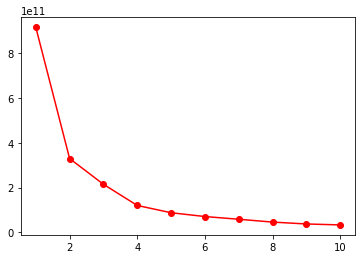

In [9]:
plt.plot(range(1,11),wcss,'or-')

In [10]:
model=KMeans(n_clusters=4)
out=model.fit_predict(x)

In [11]:
df['class']=out

In [12]:
df.head(10)

,R&D,admin,marketing,state,profit,class
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,2
2,153441.51,101145.55,407934.54,Florida,191050.39,2
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,2
5,131876.90,99814.71,362861.36,New York,156991.12,2
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1
8,120542.52,148718.95,311613.29,New York,152211.77,1
9,123334.88,108679.17,304981.62,California,149759.96,1


In [14]:
fig = px.scatter_3d(data_frame=df,x='R&D',y='marketing',z='profit',color='class')
fig.show()